# **WIP**

3 Topics: (Undecided)
  1. Impact of AI on teaching and learning
  2. Ethical concerns about AI in education
  3. Implementation of AI in education tools

## **Download required libraries**

In [1]:
!pip install gensim
!pip install pyLDAvis
!pip install whatthelang
!pip install git+https://github.com/andrianllmm/tagalog-stemmer.git@main

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.9/786.9 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.7/244.7 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached cysignals-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Created wheel for whatthelang: filename=whatthelang-1.0.1-py3-none-any.whl size=789800 sha256=a61c7f1017b9c26aa7deec7e2b8148217e2a91d514b2470de0054ef8176a027e
  Stored in directory: /root/.cache/pip/wheels/e0/f7/2e/238a9063d3acf4bbbf069443e79285ce65fc1ffb1e81380114
  Created wheel for pyfasttext: filename=pyfasttext-0.4.6-cp310-cp310-linux_x86_64.whl size=2033633 sha256=58c0b48f3d50670dd539f95a54adc38d301c10c36506a63c97da1127375f081c
  Stored in directory: /root/.cache/pip/wheels/a1/1e/10/0df99679118ea1dfa664f0b4fd2b906344f885e278563ae341
Successfully built whatthelang

## **Download stopwords from nltk**

## **Import required libraries**

In [2]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# vis
import pyLDAvis
import pyLDAvis.gensim

## **Data preprocessing**

In [46]:
import re
import pandas as pd
from whatthelang import WhatTheLang

wtl = WhatTheLang()

# Function to classify content as 'English' or 'Taglish'
def classify_language(text):
    predicted_lang = wtl.predict_lang(text)
    if predicted_lang == 'en':
        return 'English'
    elif predicted_lang == 'tl':
        return 'Taglish'
    else:
        return 'Taglish'  # Default to Taglish

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Load the dataset
df = pd.read_csv("AI in edu dataset - Sheet1.csv")

# Remove null values
df = df.dropna(subset=['Content'])

# Remove all columns except content
df = df.drop(columns=['Platform', 'Sentiment'])

# Remove newlines from content
df = df.map(lambda x: re.sub(r'\n', '', x))

# Remove punctuation
df = df.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert to lowercase
df = df.map(lambda x: x.lower())

# Remove emojis
df = df.map(lambda x: remove_emojis(x))

# Apply the classification to the 'Content' column
df['Predicted_Language'] = df['Content'].map(classify_language)

english_df = df[df['Predicted_Language'] == 'English']
taglish_df = df[df['Predicted_Language'] == 'Taglish']

# Count the number of English and Taglish texts
language_counts = df['Predicted_Language'].value_counts()

# Print the number of English and Taglish texts
print("Language Count:")
print(language_counts)

# Remove all columns except content since it is not needed anymore
english_df = english_df.drop(columns='Predicted_Language')
taglish_df = taglish_df.drop(columns='Predicted_Language')

# Display the first few rows of the preprocessed data
english_df.head()
taglish_df.head()

Language Count:
Predicted_Language
English    293
Taglish    143
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:47: DeprecationWarning: invalid escape sequence '\.'
<>:47: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-46-f0c2f24f0326>:47: DeprecationWarning: invalid escape sequence '\.'
  df = df.map(lambda x: re.sub('[,\.!?]', '', x))


,Content
225,ok sya nagbibigay ng idea at pang research mas...
227,kung aasa kayo sa ai to do school work kayo di...
229,nakakadismaya panahon ngayon mga kabataan ngay...
230,para sa akin i like ai to be a mainstream thin...
233,sobrang dali ng matuto ng students ngayon kami...


## **Data Exploration**

### **Using a Wordcloud to get the most common words in the data**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


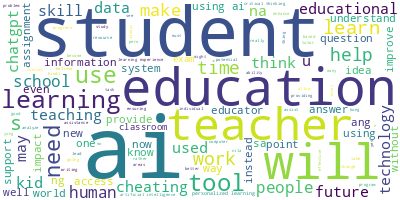

In [47]:
# ENGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(english_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


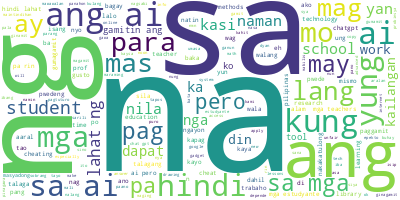

In [48]:
# TAGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(taglish_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

## **Data Preparation for LDA**

## **Lemmatization and removal of stopwords**

In [49]:
from nltk.stem import WordNetLemmatizer
from tglstemmer import stemmer

lemmatizer = WordNetLemmatizer()

english_stop_words = set(stopwords.words('english'))
tagalog_stop_words = set()
with open('tagalog_stop_words.txt', 'r') as file:
  for line in file:
    tagalog_stop_words.add(line.strip())

# Combine English and Tagalog stop words into one set
combined_stop_words = english_stop_words.union(tagalog_stop_words)

# ENGLISH. Function to process each document (tokenization, stopword removal, lemmatization)
def preprocess_english(document):
  tokens = gensim.utils.simple_preprocess(str(document), deacc=True)
  tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in combined_stop_words]
  return tokens

# TAGALOG. Function to process each document (tokenization, stopword removal, stemming)
def preprocess_taglish(document):
    tokens = gensim.utils.simple_preprocess(str(document), deacc=True)  # Tokenization
    tokens = [token for token in tokens if token not in combined_stop_words]  # Stopword removal
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in combined_stop_words]
    stemmed_tokens = [stemmer.get_stem(token) for token in tokens]  # Use stemmer for stemming
    return stemmed_tokens

# Convert the DataFrame content into a list of documents
english_data = english_df.values.tolist()
taglish_data = taglish_df.values.tolist()

english_processed_data = [preprocess_english(doc) for doc in english_data]
taglish_processed_data = [preprocess_taglish(doc) for doc in taglish_data]
processed_data = english_processed_data + taglish_processed_data

# Display the first 5 processed documents
print(english_processed_data[:5])
print(taglish_processed_data[:5])
print(processed_data[:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['education', 'system', 'ai', 'destroy', 'system', 'adapt', 'change', 'world', 'ai'], ['ai', 'tool', 'sare', 'helpful', 'need', 'use', 'properly', 'going', 'replace', 'human', 'still', 'need', 'human', 'touch'], ['ai', 'teacher', 'join', 'force', 'collaborative', 'effort', 'revolutionize', 'education', 'ai', 'teacher', 'empower', 'student', 'best'], ['kid', 'learn', 'use', 'ai', 'realize', 'career', 'obsolete', 'ai', 'take', 'smarter', 'path'], ['thing', 'embrace', 'ai', 'student', 'ever', 'learn', 'form', 'opinion', 'ask', 'ai', 'form']]
[['ok', 'sya', 'bigay', 'idea', 'pan', 'research', 'ma', 'dali', 'trabaho', 'bagay', 'hirap', 'research', 'pad', 'fact', 'check', 'nakakairita', 'studyante', 'blatant', 'chatgpt', 'assignment', 'essay'], ['asa', 'kayo', 'ai', 'school', 'work', 'kayo', 'disadvantaged', 'work'], ['dismaya', 'bata', 'asa', 'lang', 'ai', 'aral', 'talaga', 'libro'], ['like', 'ai', 'mainstream', 'thing', 'pilit', 'education', 'system', 'kas', 'laro', 'tukoy', 'sulat', 'ai'

## **Dictionary and corpus creation**

In [50]:
# Create Dictionary
id2word = corpora.Dictionary(processed_data)

# Create Corpus
corpus = [id2word.doc2bow(text) for text in processed_data]

# Display Results
print(corpus[:1][0][:15])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **LDA Model Training**

### **Single-core training**


In [51]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=3, id2word=id2word, passes=10, alpha='auto', eta='auto')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Display Topics**

In [52]:
num_topics = lda_model.num_topics

# Print each topic with its top words
for topic_id in range(num_topics):
    topic_terms = lda_model.show_topic(topic_id, topn=5)  # Get top 10 words for each topic
    print(f"Topic #{topic_id}:")
    print(", ".join([f"{word} ({round(weight, 4)})" for word, weight in topic_terms]))
    print()

Topic #0:
ai (0.030700000002980232), student (0.021800000220537186), teacher (0.013299999758601189), tool (0.008500000461935997), learning (0.008200000040233135)

Topic #1:
ai (0.05869999900460243), student (0.02419999986886978), education (0.01590000092983246), learning (0.012900000438094139), need (0.009600000455975533)

Topic #2:
ai (0.04659999907016754), student (0.014399999752640724), work (0.008799999952316284), school (0.008500000461935997), education (0.007799999788403511)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.076855 -0.029517       1        1  38.088477
2      0.064650 -0.050123       2        1  35.549075
0      0.012205  0.079640       3        1  26.362449, topic_info=         Term       Freq      Total Category  logprob  loglift
51       work  33.000000  33.000000  Default  30.0000  30.0000
1951    gamit  39.000000  39.000000  Default  29.0000  29.0000
26    teacher  64.000000  64.000000  Default  28.0000  28.0000
101    school  32.000000  32.000000  Default  27.0000  27.0000
173    people  21.000000  21.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
94       make   6.636596  25.913251   Topic3  -5.6927  -0.0289
203    future   5.902628  18.957953   Topic3  -5.8099   0.1664
64        get   5.232623  13.580831   Topic3  -5.9304   0.3795
158    answer   5.232490  15.799520   Topic3  -5.9304   0.2281
10       need   5.977412  39.544486   Topic3  -5.7973  -0.5562

[235 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
196       1  0.222793    access
196       2  0.371322    access
196       3  0.445587    access
126       1  0.145748  actually
126       2  0.728741  actually
...     ...       ...       ...
6         1  0.175742     world
6         2  0.615097     world
6         3  0.175742     world
133       2  0.737177     would
133       3  0.294871     would

[319 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

## **Coherence Score**

In [54]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.39421424752468276


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
